# MULTIVARIATE LINEAR REGRESSION

Multivariate linear regression consists of multiple features and single prediction variable. We use multidimentional arrays to process information in multivariate linear regression

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import copy

In [2]:
# Features: [size, bedrooms, floors, age]
X_train = np.array([
    [1.0, 1, 1, 2],
    [1.5, 2, 1, 1],
    [2.0, 2, 2, 2],
    [2.5, 3, 2, 1],
    [3.0, 3, 2, 2],
    [3.5, 4, 3, 1]
])

# Target
y = np.array([4.0, 5.5, 6.5, 8.0, 9.0, 10.5])

### Shape and stroing of data in numpy arrays

In [3]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y.shape}, y Type:{type(y)})")

X Shape: (6, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (6,), y Type:<class 'numpy.ndarray'>)


### Calculation of cost function and gradient descent

In [4]:
def cost_func(X, y, w, b):
    cost = 0
    m = X.shape[0]
    for i in range(m):
        cost += (np.dot(X[i], w) + b - y[i]) ** 2
    cost /= 2 * m

    return cost

In [5]:
def gradient(X, y, w, b):
    dj_dw = 0
    dj_db = 0

    m = X.shape[0]

    for i in range(m):
        dj_dw += ((np.dot(X[i], w) + b) - y[i]) * X[i]
        dj_db += (np.dot(X[i], w) + b) - y[i]

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [6]:
def gradient_descent_algo(X, y, w_in, b_in, num_iter, alpha, cost_function, gradient_function):
    J_history = []
    p_history = []

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iter):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000: 
            J_history.append(cost_function(X, y, w, b))
            p_history.append([w,b])
        
        if i%math.ceil(num_iter/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}") 

    return J_history, p_history, w, b

In [7]:
w = np.zeros(X_train.shape[1])
b = 0.

iterations = 1000000
alpha = 1e-7

j_history, p_history, w_final, b_final = gradient_descent_algo(X_train, y, w, b, iterations, alpha, cost_func, gradient)

print(f"Final value of w: {w_final} and b: {b_final: 0.3f}")
print(f"Prediction for ")

Iteration    0: Cost    28.65
Iteration 100000: Cost    19.41
Iteration 200000: Cost    19.41
Iteration 300000: Cost    19.41
Iteration 400000: Cost    19.41
Iteration 500000: Cost    19.41
Iteration 600000: Cost    19.41
Iteration 700000: Cost    19.41
Iteration 800000: Cost    19.41
Iteration 900000: Cost    19.41
Final value of w: [0.80063648 0.89067691 0.64326194 0.45842728] and b:  0.319
Prediction for 


### PLOTTING COST vs ITERATIONS

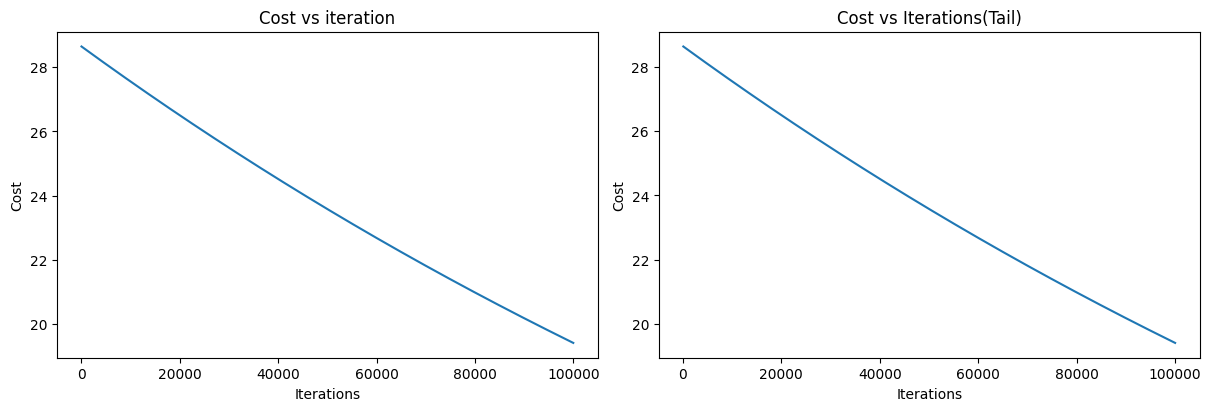

In [13]:
fig,(ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize = (12,4)) # Sets two plots
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs iteration")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Cost")

ax2.set_title("Cost vs Iterations(Tail)")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Cost")

plt.show()